In [1]:
import pandas as pd
import numpy as np
import os


from scipy.stats import jarque_bera, normaltest, t

In [5]:
cwd=os.getcwd()
close = pd.read_csv(f'{cwd}/sp500_close.csv', parse_dates=True)
symbols = ['AAPL','GOOG','IBM','NFLX','SBUX']
sub = close[symbols].copy()
sub.dropna(axis=0, how='all', inplace=True)

for symbol in symbols:
    sub[symbol + '_prev']=sub[symbol].shift(1)
    sub[symbol + '_ret']=sub[symbol]/sub[symbol + '_prev'] - 1

rets=sub[[symbol + '_ret' for symbol in symbols]].copy()
rets

,AAPL_ret,GOOG_ret,IBM_ret,NFLX_ret,SBUX_ret
0,NaN,NaN,NaN,NaN,NaN
3,0.010422,NaN,-0.007537,-0.017019,-0.004080
4,-0.025067,NaN,-0.000600,0.000338,0.002138
5,-0.001903,NaN,0.000250,0.046748,-0.007643
6,-0.000899,NaN,-0.002199,0.006073,-0.005015
...,...,...,...,...,...
1819,0.002090,-0.001915,-0.007941,-0.019349,-0.014258
1820,-0.043390,-0.047786,-0.020751,0.008903,-0.004107
1823,-0.024984,-0.050454,-0.040873,-0.049247,-0.019365
1824,0.041792,0.023489,0.018423,0.045072,0.016822


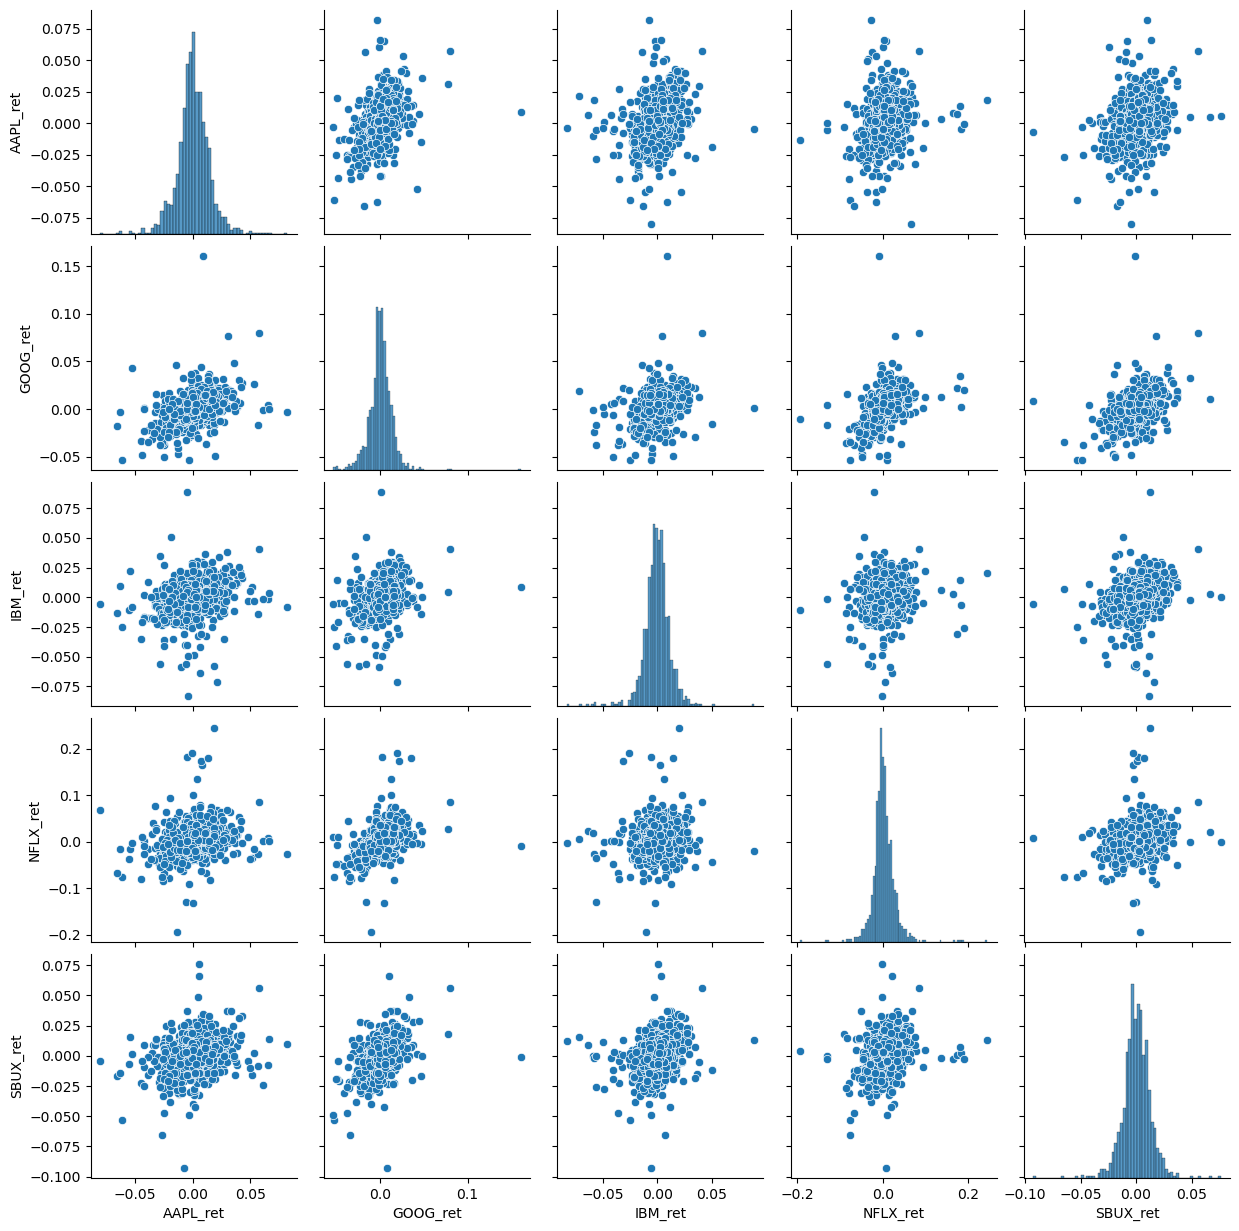

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(rets)

In [7]:
rets.mean()

AAPL_ret    0.000786
GOOG_ret    0.000745
IBM_ret    -0.000144
NFLX_ret    0.002217
SBUX_ret    0.000600
dtype: float64

In [8]:
rets.std()

AAPL_ret    0.014593
GOOG_ret    0.014069
IBM_ret     0.011876
NFLX_ret    0.027353
SBUX_ret    0.012361
dtype: float64

In [9]:
plt.scatter(rets.std(), rets.mean())
plt.xlabel('Volatility')
plt.ylabel('Return')

Text(0, 0.5, 'Return')

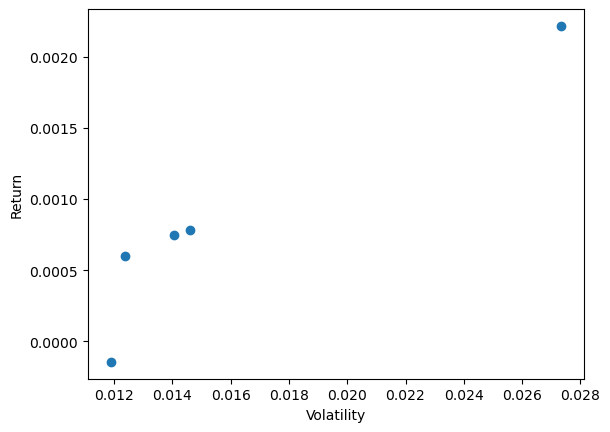

In [10]:
plt.show()

In [11]:
rets.corr()

,AAPL_ret,GOOG_ret,IBM_ret,NFLX_ret,SBUX_ret
AAPL_ret,1.000000,0.415487,0.263927,0.227387,0.307716
GOOG_ret,0.415487,1.000000,0.345643,0.404768,0.455936
IBM_ret,0.263927,0.345643,1.000000,0.163267,0.315263
NFLX_ret,0.227387,0.404768,0.163267,1.000000,0.266012
SBUX_ret,0.307716,0.455936,0.315263,0.266012,1.000000


In [12]:
rets.cov()

,AAPL_ret,GOOG_ret,IBM_ret,NFLX_ret,SBUX_ret
AAPL_ret,0.000213,0.000084,0.000046,0.000091,0.000056
GOOG_ret,0.000084,0.000198,0.000058,0.000151,0.000079
IBM_ret,0.000046,0.000058,0.000141,0.000053,0.000046
NFLX_ret,0.000091,0.000151,0.000053,0.000748,0.000090
SBUX_ret,0.000056,0.000079,0.000046,0.000090,0.000153
